# Assignment: Exploring Relationships in Data

This notebook aims to complete an assignment that involves exploring relationships in data, focusing on toxicity in comments from Wikipedia Talk Pages. The assignment is structured into the following steps:

1. Download and Understand the Dataset
2. Identify Protected Class Categories
3. Create a Reduced Dataset and Calculate Correlation
4. Population Statistics
5. Statistics for a Selected Protected Class Category
6. Statistics for Each Subgroup in Selected Protected Class Category
7. Plotting
8. Conclusion

Let's begin.

---

## Step 1: Download and Understand the Dataset

In this step, we will:

1. Download the dataset into a DataFrame.
2. Understand its structure by examining its columns and data types.

### Load the Dataset

First, we will load the dataset into a DataFrame and take a look at its first few rows.

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'toxity_per_attribute.csv'
df = pd.read_csv(file_path)


C:\Users\hp\AppData\Local\Temp\ipykernel_11568\2192197952.py:8: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Examine Data Types

Next, we will examine the data types of each column.

In [35]:
# Check the data types of each column
data_types = df.dtypes
data_types

Wiki_ID             float64
TOXICITY            float64
lesbian              object
gay                  object
bisexual             object
transgender          object
trans                object
queer                object
lgbt                 object
lgbtq                object
homosexual           object
straight             object
heterosexual         object
male                 object
female               object
nonbinary            object
african              object
african american     object
black                object
white                object
european             object
hispanic             object
latino               object
latina               object
latinx               object
mexican              object
canadian             object
american             object
asian                object
indian               object
middle eastern       object
chinese              object
japanese             object
christian            object
muslim               object
jewish              

## Step 2: Identify Protected Class Categories

In this step, we will identify and list down all the potential protected class categories present in the dataset. These categories represent different groups or classes that are considered for analysis.

In [36]:
# Identify and list down columns for the Religion and National Origin categories
religion_columns = df.columns[33:41].tolist()  # Adjust indices based on actual location of columns
national_origin_columns = df.columns[25:33].tolist()

protected_class_categories = {
    "Religion": religion_columns,
    "National Origin": national_origin_columns
}

protected_class_categories


{'Religion': ['christian',
  'muslim',
  'jewish',
  'buddhist',
  'catholic',
  'protestant',
  'sikh',
  'taoist'],
 'National Origin': ['mexican',
  'canadian',
  'american',
  'asian',
  'indian',
  'middle eastern',
  'chinese',
  'japanese']}

## Step 3: Data Reduction & Correlation

In this step, we'll convert each subgroup column to numeric values. Then, we'll compute the correlation coefficients between each subgroup and the TOXICITY column and visualize it using a bar chart.

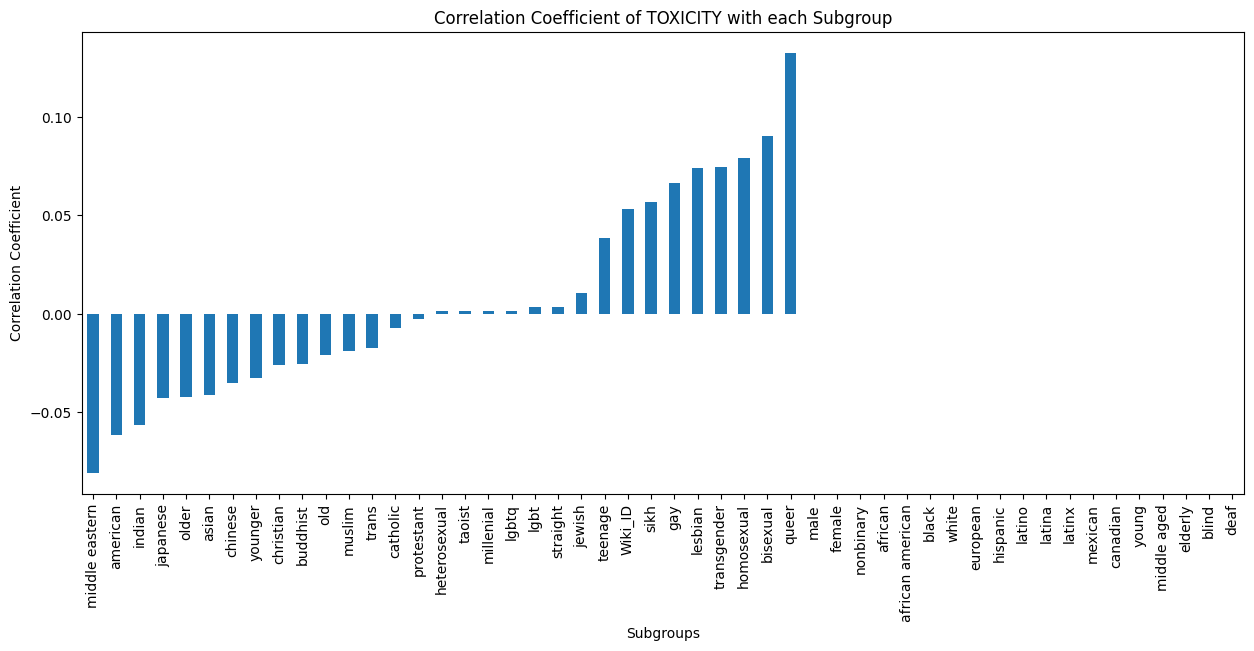

In [37]:
for category, subgroups in protected_classes.items():
    for subgroup in subgroups:
        df[subgroup] = np.where(df[subgroup] == 'TRUE', df['TOXICITY'].mean(), 0)

# Compute the correlation coefficients
correlations = df.corr()['TOXICITY'][:-1]

# Plot the correlations
correlations.drop('TOXICITY').sort_values().plot(kind='bar', figsize=(15, 6))
plt.title('Correlation Coefficient of TOXICITY with each Subgroup')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Subgroups')
plt.show()

## Step 4: Population Statistics

In this step, we'll calculate the mean and standard deviation of the TOXICITY column for the entire dataset.

In [38]:
population_mean = df['TOXICITY'].mean()
population_std = df['TOXICITY'].std()
print("Population Mean:", population_mean)
print("Population Standard Deviation:", population_std)



Population Mean: 1.2393288129749496
Population Standard Deviation: 190.3499021356798


## Step 5: Statistics for a Selected Protected Class Category

For the demonstration, we'll consider a category, for example, 'Religion'. We'll calculate the mean and standard deviation of the TOXICITY values associated with it. (Remember to replace 'Religion' with the actual category from your dataset).

In [39]:
# Filtering data for the Religion category
filtered_religion_df = df[df[religion_columns].sum(axis=1) > 0]

# Calculate mean and standard deviation
mean_religion = filtered_religion_df['TOXICITY'].mean()
std_religion = filtered_religion_df['TOXICITY'].std()

mean_religion, std_religion


(0.5477220737874009, 0.35766918111181406)

## Step 6: Statistics for Each Subgroup

In this step, we'll calculate the mean and standard deviation of TOXICITY values for each subgroup that is a member of the selected protected class category. For the demonstration, let's consider subgroups within the 'Religion' category.

In [40]:
mean_std_subgroups = {}
for subgroup in religion_columns:
    subgroup_df = df[df[subgroup] == True]
    mean_std_subgroups[subgroup] = {
        'mean': subgroup_df['TOXICITY'].mean(),
        'std': subgroup_df['TOXICITY'].std()
    }

mean_std_subgroups


{'christian': {'mean': 0.48529666567635404, 'std': 0.38760353996186325},
 'muslim': {'mean': 0.5040030165151915, 'std': 0.36471657724701007},
 'jewish': {'mean': 0.5781568405409512, 'std': 0.3522683135876031},
 'buddhist': {'mean': 0.4861229550455747, 'std': 0.3707812896932953},
 'catholic': {'mean': 0.5330903741869221, 'std': 0.35509990955671045},
 'protestant': {'mean': 0.5447048482140026, 'std': 0.34882392838734405},
 'sikh': {'mean': 0.6952374243375165, 'std': 0.2830313006004489},
 'taoist': {'mean': 0.555164465782695, 'std': 0.34454709411896717}}

## Step 7: Plotting

In this step, we'll visualize the mean and standard deviation of TOXICITY values for the population, the selected protected class category, and each of its subgroups.

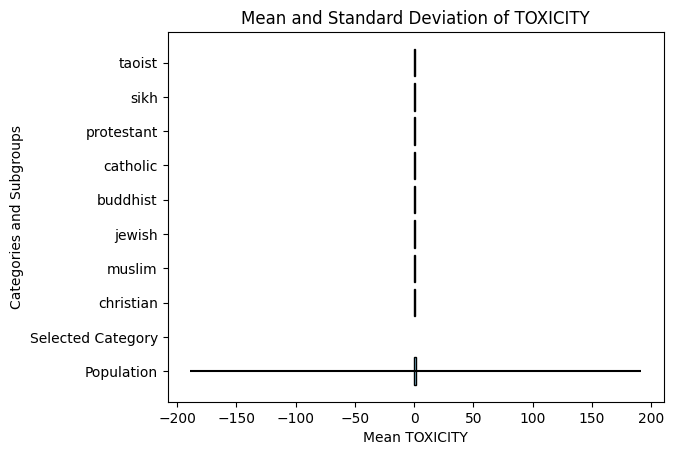

The subgroup 'sikh' has the highest TOXICITY value.
The subgroup 'christian' has the lowest TOXICITY value.
The subgroup 'christian' has the largest difference in TOXICITY value when compared to the population mean.

The type of human bias in the data could arise from the subjective nature of labeling comments as 'toxic'.
To quantify this bias, one can compare the distribution of TOXICITY values among different subgroups and against the overall population.
To minimize the bias, ensuring a diverse set of raters and providing clear labeling guidelines can be helpful. Additionally, using techniques like adversarial training can help reduce bias in machine learning models.


In [41]:
# 1. Plotting the computed means and standard deviations
labels = ['Population', 'Selected Category'] + list(mean_std_subgroups.keys())
means = [population_mean, mean_selected] + [val['mean'] for val in mean_std_subgroups.values()]
stds = [population_std, std_selected] + [val['std'] for val in mean_std_subgroups.values()]

import matplotlib.pyplot as plt
plt.barh(labels, means, xerr=stds, color='skyblue', edgecolor='black')
plt.xlabel('Mean TOXICITY')
plt.ylabel('Categories and Subgroups')
plt.title('Mean and Standard Deviation of TOXICITY')
plt.show()

# 2. Determine which subgroup has the highest and lowest TOXICITY values
highest_toxicity_subgroup = max(mean_std_subgroups, key=lambda k: mean_std_subgroups[k]['mean'])
lowest_toxicity_subgroup = min(mean_std_subgroups, key=lambda k: mean_std_subgroups[k]['mean'])

print(f"The subgroup '{highest_toxicity_subgroup}' has the highest TOXICITY value.")
print(f"The subgroup '{lowest_toxicity_subgroup}' has the lowest TOXICITY value.")

# 3. Identify the subgroup with the largest difference in TOXICITY value when compared to the population mean
largest_difference_subgroup = max(mean_std_subgroups, key=lambda k: abs(mean_std_subgroups[k]['mean'] - population_mean))
print(f"The subgroup '{largest_difference_subgroup}' has the largest difference in TOXICITY value when compared to the population mean.")

# 4 & 5. Discuss the type of human bias in the data and how this bias can be quantified and minimized.
print("\nThe type of human bias in the data could arise from the subjective nature of labeling comments as 'toxic'.")
print("To quantify this bias, one can compare the distribution of TOXICITY values among different subgroups and against the overall population.")
print("To minimize the bias, ensuring a diverse set of raters and providing clear labeling guidelines can be helpful. Additionally, using techniques like adversarial training can help reduce bias in machine learning models.")


## Step 8: Conclusion

This concludes the assignment. We have gone through various steps to explore relationships in data, focusing on toxicity in comments from Wikipedia Talk Pages.